In [2]:
import streamlit as st

In [3]:
import pandas as pd
import numpy as np

In [7]:
chart_data = pd.DataFrame(
    np.random.randn(20, 3),
    columns=['a', 'b', 'c'])

In [8]:
chart_data

,a,b,c
0,-0.334285,1.119697,1.360500
1,-0.191799,0.671192,-0.784190
2,-0.567547,-0.785488,0.272201
3,0.934833,-0.223303,-0.401744
4,-0.728438,1.345378,0.479548
5,-0.223110,-1.526719,1.611511
6,1.204665,0.193605,0.096136
7,0.001168,-0.461742,-0.113779
8,-0.268935,1.066501,-0.236522
9,0.256444,0.566716,1.023879


In [9]:
import matplotlib.pyplot as plt

<AxesSubplot:>

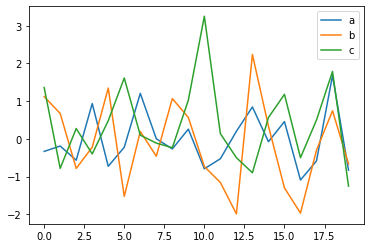

In [10]:
chart_data.plot()

In [12]:
import datetime
import streamlit as st


In [6]:
import pandas as pd
import yfinance as yf

In [1]:
from statsmodels.tsa.arima.model import ARIMA

c:\Users\shlok\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [133]:
start_date = '2000-01-01'
end_date = '2023-12-31'
ticker = 'NYT'

df = yf.download(ticker, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [72]:
# df.reset_index(level=0,inplace=True)

In [143]:
train = df.iloc[:5000]['Close']
test = df.iloc[5000:]['Close']

In [156]:
type(test)

pandas.core.series.Series

In [157]:
model = ARIMA(train,order=(1,1,1))
arima=model.fit()

c:\Users\shlok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shlok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shlok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [159]:
y_hat=test

In [160]:
y_hat=pd.DataFrame(y_hat)

In [161]:
y_hat

,Close
Date,
2019-11-15,31.590000
2019-11-18,31.730000
2019-11-19,31.780001
2019-11-20,31.230000
2019-11-21,30.889999
...,...
2023-08-16,42.580002
2023-08-17,42.009998
2023-08-18,43.060001


In [162]:
type(y_hat)

pandas.core.frame.DataFrame

In [163]:
arima.forecast(len(test))

c:\Users\shlok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\shlok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


5000    31.142700
5001    31.126731
5002    31.111990
5003    31.098382
5004    31.085821
          ...    
5942    30.935067
5943    30.935067
5944    30.935067
5945    30.935067
5946    30.935067
Name: predicted_mean, Length: 947, dtype: float64

In [153]:
y_hat['arima']=arima.forecast(len(test))

c:\Users\shlok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\shlok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [154]:
y_hat

,Close,arima
Date,,
2019-11-15,31.590000,NaN
2019-11-18,31.730000,NaN
2019-11-19,31.780001,NaN
2019-11-20,31.230000,NaN
2019-11-21,30.889999,NaN
...,...,...
2023-08-16,42.580002,NaN
2023-08-17,42.009998,NaN
2023-08-18,43.060001,NaN


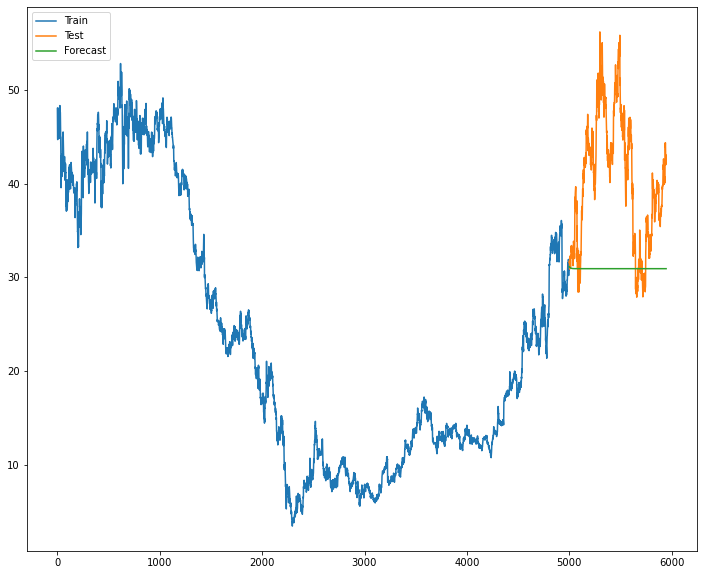

In [132]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.plot(np.asarray(train.index),np.asarray(train.Close),label="Train")
plt.plot(np.asarray(test.index),np.asarray(test['Close']),label="Test")
plt.plot(np.asarray(y_hat.index),np.asarray(y_hat['arima']),label="Forecast")
plt.legend()

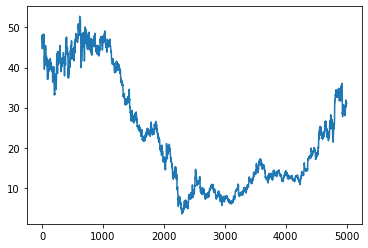

In [131]:
plt.plot(np.asarray(train.index),np.asarray(train.Close),label="Train")

In [129]:
type(np.asarray(train.Close))

numpy.ndarray

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from pmdarima import auto_arima

c:\Users\shlok\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [16]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [54]:
start_date = '1990-01-01'
end_date = '2023-12-31'
ticker = 'NYT'

df = yf.download(ticker, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [55]:
df.shape

(8476, 6)

In [56]:
step = auto_arima(df['Close'], trace=True, suppress_warnings=True) 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13005.991, Time=15.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13022.125, Time=0.69 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13016.695, Time=0.57 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13016.320, Time=0.97 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13020.494, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13014.699, Time=1.68 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13014.682, Time=3.90 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=13001.776, Time=15.69 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=13015.720, Time=11.00 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=13002.970, Time=21.40 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=13008.101, Time=18.56 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=13002.343, Time=12.44 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=13017.345, Time=1.79 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=13005.917, Time=25.95 sec
 ARIMA(3,1,2

In [57]:
values=str(step)

In [58]:
p=int(values[7])
d=int(values[9])
q=int(values[11])

In [67]:
num_train=round(len(df)*0.9)

In [68]:
train = df.iloc[:num_train]['Close']
test =df.iloc[num_train:]['Close']

In [71]:
model = ARIMA(train,order=(p,d,q))
arima=model.fit()

c:\Users\shlok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shlok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shlok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [72]:
y_hat=pd.DataFrame()
y_hat['Actual']=test.copy()
y_hat['arima']=arima.forecast(len(test),index=test.index)

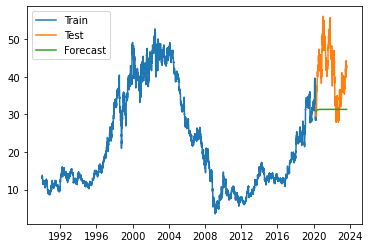

In [73]:
plt.plot(np.asarray(train.index),np.asarray(train),label="Train")
plt.plot(np.asarray(test.index),np.asarray(test),label="Test")
plt.plot(np.asarray(y_hat.index),np.asarray(y_hat['arima']),label="Forecast")
plt.legend()

# LSTM

In [1]:
import yfinance
from pmdarima import auto_arima
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler

c:\Users\shlok\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [23]:
start = '1990-01-01'
end = '2022-12-31'
ticker = input()

df = yfinance.download(ticker, start, end)

[*********************100%%**********************]  1 of 1 completed


In [24]:
stock_close = df['Close']
values = stock_close.values
train_data_len = round(len(values)*0.8)

In [25]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler_data = scaler.fit_transform(values.reshape(-1,1))

In [26]:
train_data = scaler_data[0: train_data_len, :]

In [27]:
x_train = []
y_train = []

In [28]:
len(train_data)

6652

In [29]:
train_data[0:60,0]

array([0.00119342, 0.00120569, 0.00121183, 0.00121796, 0.00123024,
       0.00121183, 0.00113206, 0.00105843, 0.00105843, 0.00104616,
       0.00107684, 0.00099707, 0.00095412, 0.00104616, 0.00099707,
       0.00102161, 0.00103389, 0.00104003, 0.00097253, 0.00099707,
       0.00103389, 0.00103389, 0.00101548, 0.00104616, 0.00108297,
       0.0010707 , 0.00099707, 0.0009848 , 0.00104616, 0.00103389,
       0.00105843, 0.00104616, 0.00104616, 0.00102161, 0.00100934,
       0.00103389, 0.0009848 , 0.00099707, 0.00103389, 0.00100934,
       0.00103389, 0.00104616, 0.00102161, 0.00105843, 0.00109524,
       0.00110138, 0.00116888, 0.00117501, 0.00116274, 0.00117501,
       0.00118115, 0.00116888, 0.00134068, 0.00144499, 0.0013959 ,
       0.00140817, 0.00136522, 0.00143885, 0.00143885, 0.00142658])

In [30]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [31]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [32]:
test_data = scaler_data[train_data_len-60: , : ]
x_test = []
y_test = values[train_data_len:]

In [33]:
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [34]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [35]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123751 (483.40 KB)
Trainable params: 123751 (483.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=1)

6592/6592 [==============================] - 162s 24ms/step - loss: 2.4005e-05


In [39]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

52/52 [==============================] - 3s 28ms/step


0.8413243239282917

<ipython-input-40-17cae6d69c5f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


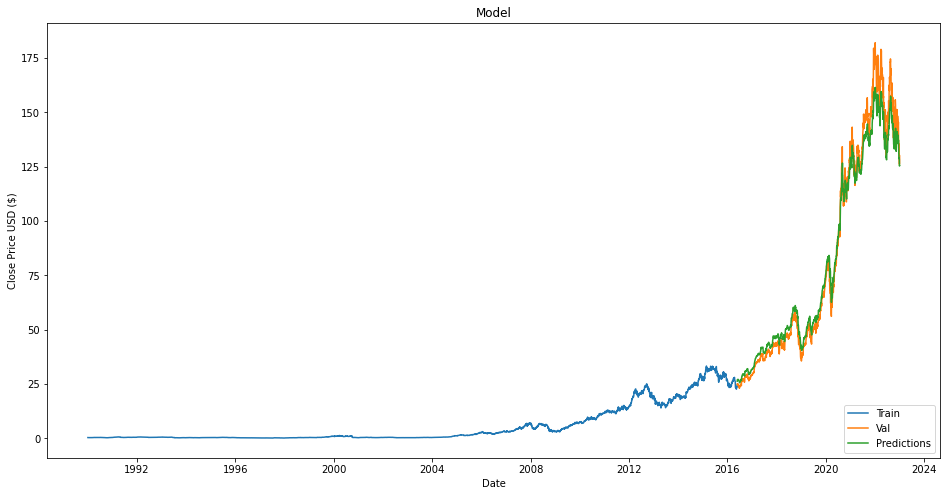

In [40]:
data = df.filter(['Close'])
train = data[:train_data_len]
validation = data[train_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [1]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model

c:\Users\shlok\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
model =load_model("lstm.keras")

In [3]:
type(model)

keras.src.engine.sequential.Sequential

In [5]:
    start_date = '1990-01-01'
    end_date = '2023-12-31'
    df = yf.download("AAPL", start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [7]:
step = auto_arima(df['Close'], trace=True, suppress_warnings=True) 
values=str(step)
p=int(values[7])
d=int(values[9])
q=int(values[11])

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=6.37 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=29010.606, Time=0.32 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=26454.712, Time=0.53 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=2.08 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=25411.034, Time=0.77 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=24807.365, Time=0.90 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=24277.495, Time=1.28 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=24073.366, Time=1.94 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=10.39 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=7.99 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=24075.365, Time=3.41 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 36.055 seconds


In [14]:
        train = df.iloc[:int(len(df)*0.8)]['Close']
        test =df.iloc[int(len(df)*0.8):]['Close']

In [15]:
        
        
        model = ARIMA(train,order=(p,d,q))
        arima=model.fit()

c:\Users\shlok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shlok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shlok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [16]:
        
        
        y_hat=pd.DataFrame()
        y_hat['Actual']=test.copy()
        y_hat['arima']=arima.forecast(len(test),index=test.index)


In [17]:
import matplotlib.pyplot as plt

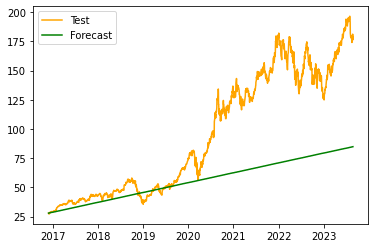

In [26]:

        # plt.plot(np.asarray(train.index),np.asarray(train),label="Train")
        plt.plot(np.asarray(test.index),np.asarray(test),color='orange',label="Test")
        plt.plot(np.asarray(y_hat.index),np.asarray(y_hat['arima']),color='green',label="Forecast")
        plt.legend()


In [19]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [20]:
y_hat

,Actual,arima
Date,,
2016-11-29,27.865000,27.947701
2016-11-30,27.629999,28.030428
2016-12-01,27.372499,28.053961
2016-12-02,27.475000,28.060613
2016-12-05,27.277500,28.107130
...,...,...
2023-08-21,175.839996,84.679840
2023-08-22,177.229996,84.713375
2023-08-23,181.119995,84.746911


In [23]:
sqrt(mean_squared_error(y_hat['Actual'],y_hat['arima']))

53.071408793185526

In [27]:
test.shape

(1696,)

In [28]:
train.shape

(6782,)

In [29]:
test.shape[0]+train.shape[0]

8478

In [30]:
df.shape

(8478, 6)

In [35]:
from statsmodels.tsa.stattools import adfuller
adfuller(test.diff().dropna())

(-9.08353034556811,
 3.99656020381316e-15,
 17,
 1677,
 {'1%': -3.4342553892578462,
  '5%': -2.8632650083386295,
  '10%': -2.5676883512313102},
 7134.826643096803)

In [82]:
step = auto_arima(df['Close'], trace=True, suppress_warnings=True) 
values=str(step)
p=int(values[7])
d=int(values[9])
q=int(values[11])

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=3.41 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=29010.606, Time=0.18 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=26454.712, Time=0.28 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=1.15 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=25411.034, Time=0.40 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=24807.365, Time=0.54 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=24277.495, Time=0.96 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=24073.366, Time=0.95 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=5.67 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=4.31 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=24075.365, Time=4.01 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 21.901 seconds


In [83]:
model = ARIMA(df['Close'],order=(p,d,q))
arima=model.fit()

c:\Users\shlok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shlok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shlok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [85]:
from datetime import date, timedelta
future_dates=[]
for i in range(1,31):
    future_dates.append((date.today()+timedelta(days=i)).isoformat()) 

In [86]:
y_hat=pd.DataFrame()
y_hat['arima']=arima.forecast(30,index=pd.to_datetime(future_dates))

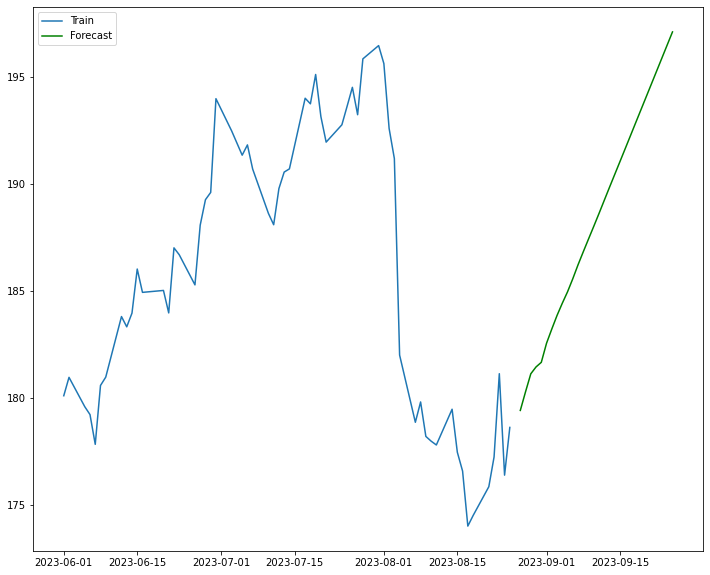

In [91]:
plt.figure(figsize=(12,10))
plt.plot(np.asarray(test[-60:].index),np.asarray(test[-60:]),label="Train")
plt.plot(np.asarray(y_hat.index),np.asarray(y_hat['arima']),color='green',label="Forecast")
plt.legend()

In [48]:
future_dates

['2023-08-27',
 '2023-08-28',
 '2023-08-29',
 '2023-08-30',
 '2023-08-31',
 '2023-09-01',
 '2023-09-02',
 '2023-09-03',
 '2023-09-04',
 '2023-09-05',
 '2023-09-06',
 '2023-09-07',
 '2023-09-08',
 '2023-09-09',
 '2023-09-10',
 '2023-09-11',
 '2023-09-12',
 '2023-09-13',
 '2023-09-14',
 '2023-09-15',
 '2023-09-16',
 '2023-09-17',
 '2023-09-18',
 '2023-09-19',
 '2023-09-20',
 '2023-09-21',
 '2023-09-22',
 '2023-09-23',
 '2023-09-24',
 '2023-09-25']